VGGNet网络结构组成如图所示，一共有6个不同的版本，最常用的是VGG16。从图中可以看出，**VGGNet采用了五组卷积与三个全连接层，最后使用Softmax做分类。VGGNet有一个显著的特点：每次经过池化层（maxpool）后特征图的尺寸减小一倍，而通道数则增加一倍（最后一个池化层除外）。**

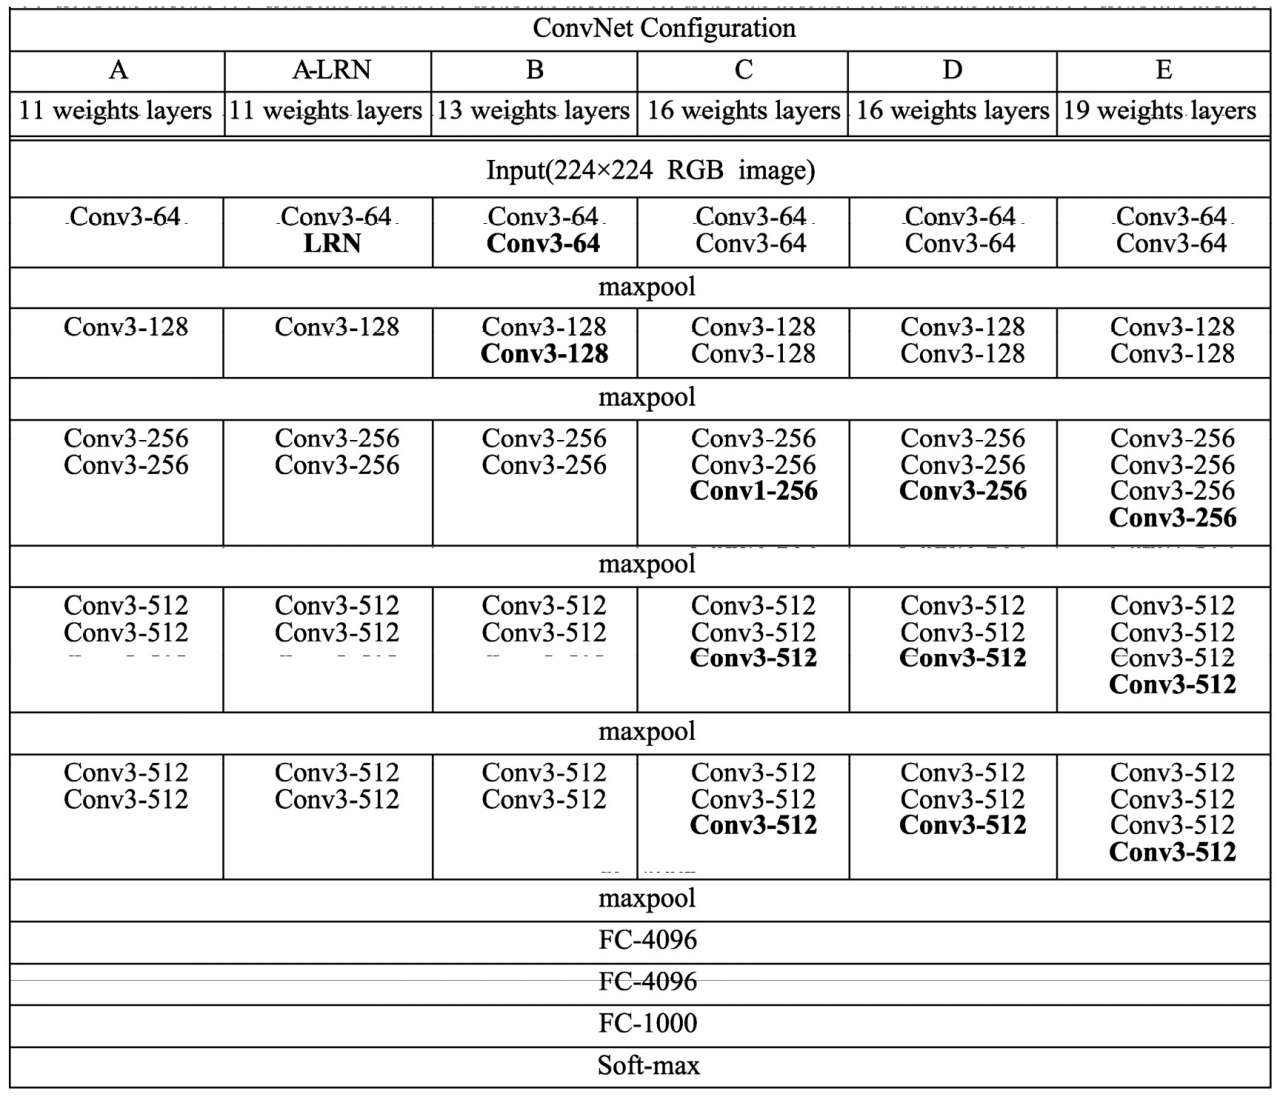

AlexNet中有使用到5×5的卷积核，而在VGGNet中，使用的卷积核基本都是3×3，而且**很多地方出现了多个3×3堆叠的现象，这种结构的优点在于，首先从感受野来看，两个3×3的卷积核与一个5×5的卷积核是一样的；其次，同等感受野时，3×3卷积核的参数量更少。更为重要的是，两个3×3卷积核的非线性能力要比5×5卷积核强，因为其拥有两个激活函数，可大大提高卷积网络的学习能力。**

In [1]:
import torch
from vgg import VGG

In [2]:
#实例化VGG类，在此设置输出分类数为21，并转移到GPU上
vgg = VGG(21).cuda()
input = torch.randn(1, 3, 224, 224).cuda()
input.shape

torch.Size([1, 3, 224, 224])

In [3]:
#调用VGG，输出21类的得分
scores =vgg(input)
scores.shape

torch.Size([1, 21])

In [4]:
#也可以单独调用卷积模块，输出最后一层的特征图
features = vgg.features(input)
features.shape

torch.Size([1, 512, 7, 7])

In [5]:
#打印出VGGNet的卷积层，5个卷积层一共30层
vgg.features

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (17): Conv2d(256, 512, kernel_si

In [6]:
#打印出VGGNet的3个全连接层
vgg.classifier

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=4096, out_features=21, bias=True)
)